# **The Coldest Black Friday Weekend in 10 Years Had Consumers Gobbling Up Seasonal Categories**

### This is my recreation the plots shown in the recent blog post by Planalytics.
## Code by Jacob Hinson

In [95]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset

# The packages below are necessary for making plots with nice continental and state boundaries
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import scipy.ndimage as ndimage
import xarray as xr

# Set the map projection for plots
crs = ccrs.LambertConformal(central_longitude=-100.0, central_latitude=45.0) # Set central lat/lon of map

### **2022 netCDF Files**

In [96]:
def netCDF22(JD):
    global Tc22
    # Read in NetCDF files with relevant variables
    nc_file_uwnd = Dataset('uwnd.2022.nc') # zonal wind data
    nc_file_air22 = Dataset('air.2022.nc') # temperature data

    # Variables of interest for making maps
    lon = nc_file_uwnd.variables['lon'][:] # Read-in array of longitude values (every 2.5 deg longitude)
    lat = nc_file_uwnd.variables['lat'][2:35] # Read-in array of latitude values (every 2.5 deg latitude)
    Tc22 = np.squeeze(nc_file_air22.variables['air'][JD,:,2:35,:])-273.15 # Temperature (C) array with dimensions p x lat x lon at JD

### **2023 netCDF Files**

In [97]:
def netCDF23(JD):
    global Tc23
    # Read in NetCDF files with relevant variables
    nc_file_air23 = Dataset('air.2023.nc') # temperature data

    # Variable of interest for making maps
    Tc23 = np.squeeze(nc_file_air23.variables['air'][JD,:,2:35,:])-273.15 # Temperature (C) array with dimensions p x lat x lon at JD

## **Function to select and calculate temperature difference based on Julian Day**

In [98]:
# Days Thurs - Sun are 1304, 1308, 1312, 1316
def netCDFfunc(JD):
    global Tc_diff
    netCDF22(JD)
    netCDF23(JD)
    
    # Temperature difference at the surface
    Tc_diff =  np.squeeze(Tc23[np.where(p23 == 1000), :, :] - Tc22[np.where(p22 == 1000), :, :])

In [99]:
# Function used to create the map subplots
def plot_background(ax): # Use to define properties assigned to variable "ax"
    ax.set_extent([235., 290., 20., 55.]) # Set lat/lon bounds of map - note that longitudes can be entered either all as degrees East or deg. east or west (negative values for west longitudes)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5) # Set coastline
    ax.add_feature(cfeature.STATES, linewidth=0.5) # Set states
    ax.add_feature(cfeature.BORDERS, linewidth=0.5) # Set borders
    return ax # This essentially stores all the above settings within the variable "ax"

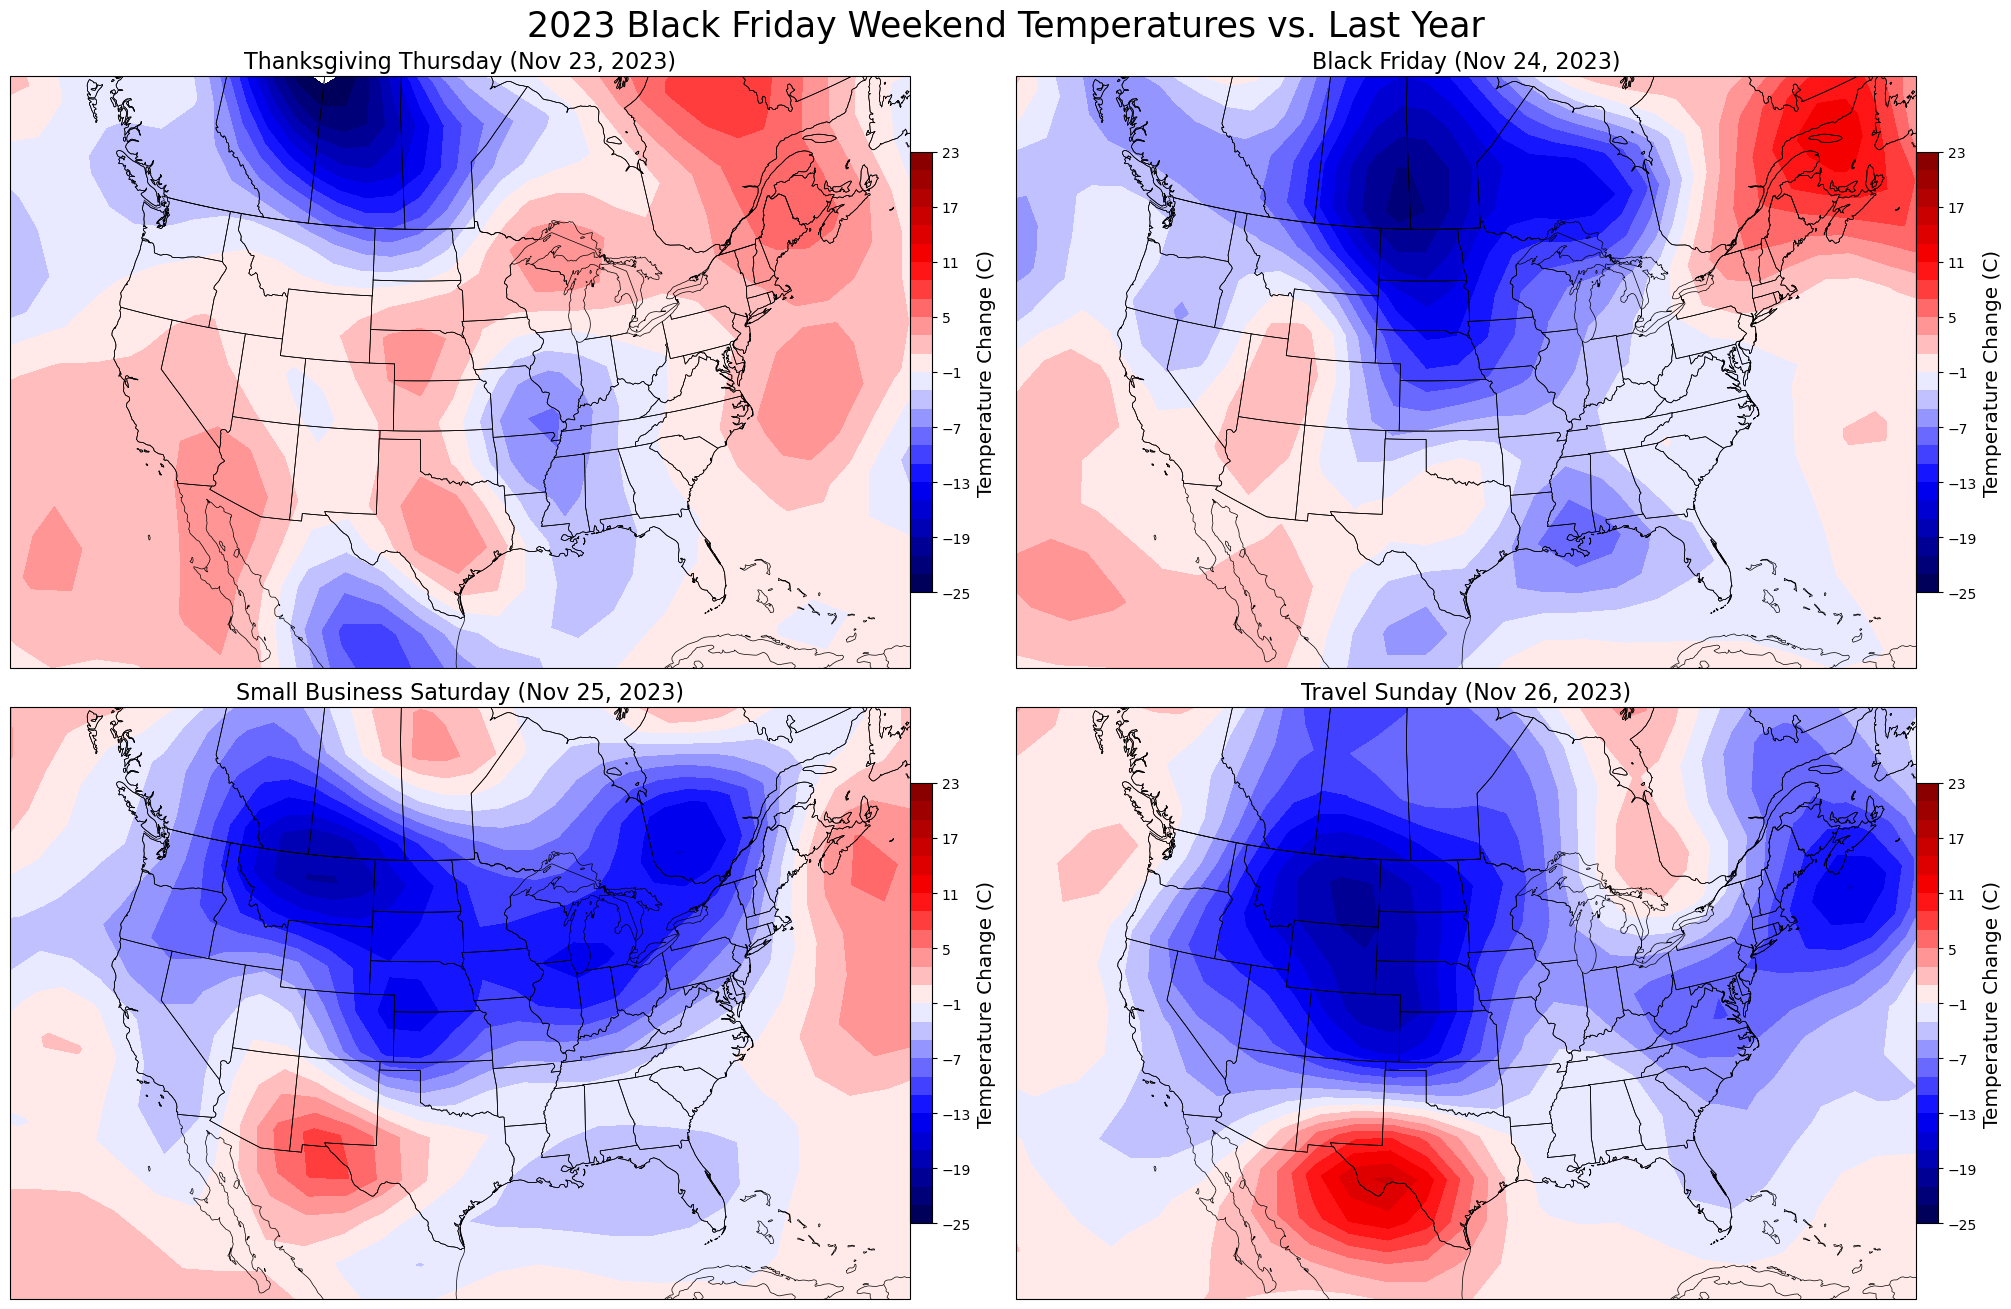

In [100]:
# Combine 1D latitude and longitudes into a 2D grid of locations using "meshgrid"
lon_2d, lat_2d = np.meshgrid(lon, lat)

# Create the figure and plot background on different axes
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=(20, 13), constrained_layout=True, subplot_kw={'projection': crs}) # "nrows" and "ncolumns" specifies the distribution of the panels of the four panel plot; "crs" is the variable defined earlier defining the map projection

# This flatten command is necessary for setting up the map (still trying to learn what this actually does)
axlist = axarr.flatten()
for ax in axlist:
    plot_background(ax)

fig.suptitle('2023 Black Friday Weekend Temperatures vs. Last Year', fontsize=25)

netCDFfunc(1304)
contour_lvls_Tc_diff1=range(-25,25,2)
cf1 = axlist[0].contourf(lon_2d, lat_2d, Tc_diff, contour_lvls_Tc_diff1, cmap='seismic', transform=ccrs.PlateCarree())
axlist[0].set_title('Thanksgiving Thursday (Nov 23, 2023)', fontsize=16)
cb1 = fig.colorbar(cf1, ax=axlist[0], orientation='vertical', shrink=0.74, pad=0)
cb1.set_label('Temperature Change (C)', size='x-large')

netCDFfunc(1308)
contour_lvls_Tc_diff2=range(-25,25,2)
cf2 = axlist[1].contourf(lon_2d, lat_2d, Tc_diff, contour_lvls_Tc_diff2, cmap='seismic', transform=ccrs.PlateCarree())
axlist[1].set_title('Black Friday (Nov 24, 2023)', fontsize=16)
cb2 = fig.colorbar(cf2, ax=axlist[1], orientation='vertical', shrink=0.74, pad=0)
cb2.set_label('Temperature Change (C)', size='x-large')

netCDFfunc(1312)
contour_lvls_Tc_diff3=range(-25,25,2)
cf3 = axlist[2].contourf(lon_2d, lat_2d, Tc_diff, contour_lvls_Tc_diff3, cmap='seismic', transform=ccrs.PlateCarree())
axlist[2].set_title('Small Business Saturday (Nov 25, 2023)', fontsize=16)
cb3 = fig.colorbar(cf3, ax=axlist[2], orientation='vertical', shrink=0.74, pad=0)
cb3.set_label('Temperature Change (C)', size='x-large')

netCDFfunc(1316)
contour_lvls_Tc_diff4=range(-25,25,2)
cf4 = axlist[3].contourf(lon_2d, lat_2d, Tc_diff, contour_lvls_Tc_diff4, cmap='seismic', transform=ccrs.PlateCarree())
axlist[3].set_title('Travel Sunday (Nov 26, 2023)', fontsize=16)
cb4 = fig.colorbar(cf4, ax=axlist[3], orientation='vertical', shrink=0.74, pad=0)
cb4.set_label('Temperature Change (C)', size='x-large')